# 1. Library Installation

In [1]:
!pip install -q pandas
!pip install -q vaderSentiment

# 2. Import Dataset

In [2]:
import pandas as pd

file_path = '../dataset/phase 4/topic_modelling_result.xlsx'
df = pd.read_excel(file_path)

In [3]:
df

,app,content,score,content_short,cluster,distance_to_its_centroid
0,global storms,Great app. Always turn to it for accurate info...,5,accurate information,1,0.647051
1,Tropical Hurricane Tracker,Excellent app...lots of information in one place.,5,lots of information,1,0.650179
2,My Earthquake Alerts - Map,Great app easy to use good information.,5,Great app easy to use good information,1,0.655233
3,Earthquake Alert!,great app. easy to use and good information.,5,great app. easy to use and good information,1,0.658061
4,global storms,This is a wonderful app that everyone should h...,5,Very accurate and up to the minute with pertin...,1,0.658440
...,...,...,...,...,...,...
14957,Yurekuru Call,There was no response during an emergency eart...,3,It's a non-reliable plane,22,0.965684
14958,VicEmergency,Inaccurate slow woeful total waste of download...,1,Inaccurate slow woeful,22,1.001129
14959,My Earthquake Alerts - Map,Been faithful so far. Dependable.,5,Dependable,22,1.048918
14960,Wind Map Hurricane Tracker 3D,I love watching this! I am certainly not an ex...,5,not an expert,22,1.058714


# 3. Sentiment Analysis

In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import time

analyzer = SentimentIntensityAnalyzer()
sentiment_score_list = []

start_time = time.time()
for i, sentence in enumerate(df['content'], 1):
    vs = analyzer.polarity_scores(sentence)
    sentiment_score_list.append(vs['compound'])

    # Print progress every 500 sentences
    if i % 1000 == 0:
        elapsed_time = time.time() - start_time
        print(f"Processed {i} sentences in {elapsed_time:.2f} seconds.")

# Total time taken
total_time = time.time() - start_time
print(f"Total time taken: {total_time:.2f} seconds.")

Processed 1000 sentences in 0.24 seconds.
Processed 2000 sentences in 0.41 seconds.
Processed 3000 sentences in 0.56 seconds.
Processed 4000 sentences in 0.70 seconds.
Processed 5000 sentences in 0.84 seconds.
Processed 6000 sentences in 1.02 seconds.
Processed 7000 sentences in 1.19 seconds.
Processed 8000 sentences in 1.41 seconds.
Processed 9000 sentences in 1.59 seconds.
Processed 10000 sentences in 1.73 seconds.
Processed 11000 sentences in 1.89 seconds.
Processed 12000 sentences in 2.07 seconds.
Processed 13000 sentences in 2.25 seconds.
Processed 14000 sentences in 2.44 seconds.
Total time taken: 2.65 seconds.


In [5]:
df['sentiment_score'] = sentiment_score_list
df['sentiment'] = df['sentiment_score'].apply(lambda score: 'positive' if score >= 0 else 'negative')

In [6]:
df

,app,content,score,content_short,cluster,distance_to_its_centroid,sentiment_score,sentiment
0,global storms,Great app. Always turn to it for accurate info...,5,accurate information,1,0.647051,0.6249,positive
1,Tropical Hurricane Tracker,Excellent app...lots of information in one place.,5,lots of information,1,0.650179,0.5719,positive
2,My Earthquake Alerts - Map,Great app easy to use good information.,5,Great app easy to use good information,1,0.655233,0.8720,positive
3,Earthquake Alert!,great app. easy to use and good information.,5,great app. easy to use and good information,1,0.658061,0.8720,positive
4,global storms,This is a wonderful app that everyone should h...,5,Very accurate and up to the minute with pertin...,1,0.658440,0.5719,positive
...,...,...,...,...,...,...,...,...
14957,Yurekuru Call,There was no response during an emergency eart...,3,It's a non-reliable plane,22,0.965684,-0.6573,negative
14958,VicEmergency,Inaccurate slow woeful total waste of download...,1,Inaccurate slow woeful,22,1.001129,-0.7178,negative
14959,My Earthquake Alerts - Map,Been faithful so far. Dependable.,5,Dependable,22,1.048918,0.4404,positive
14960,Wind Map Hurricane Tracker 3D,I love watching this! I am certainly not an ex...,5,not an expert,22,1.058714,0.8356,positive


# 4. User Rating vs Sentiment Based on APP

In [14]:
!pip install -q adjustText

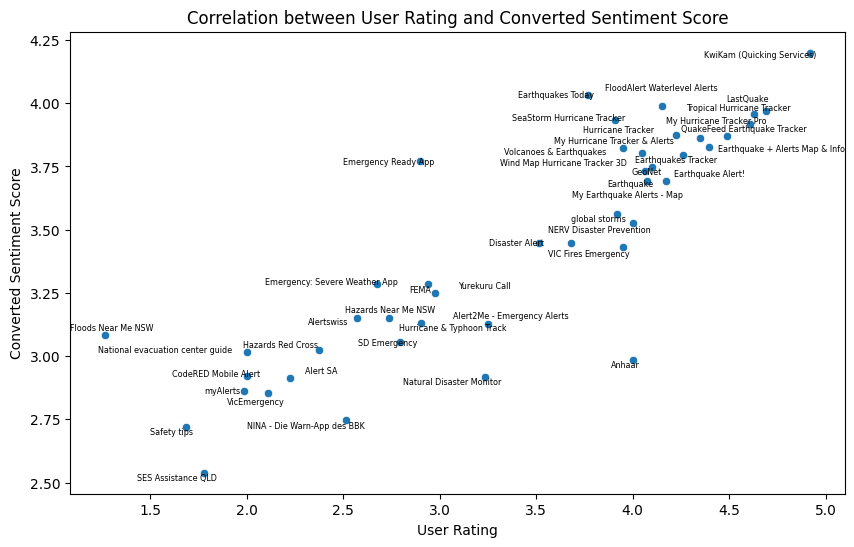

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text

df['converted_sentiment_score'] = df['sentiment_score'].apply(lambda x: ((x + 1) / 2) * 4 + 1)
sentiment_analysis_df = df[['app', 'score', 'converted_sentiment_score']].groupby('app').mean().reset_index()

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create scatter plot
plot = sns.scatterplot(data=sentiment_analysis_df, x='score', y='converted_sentiment_score')

# Initialize an empty list to store text objects
texts = []

# Add texts to the plot without drawing arrows
for i in range(sentiment_analysis_df.shape[0]):
    texts.append(plot.text(sentiment_analysis_df.score[i]+0.01, sentiment_analysis_df.converted_sentiment_score[i],
                           sentiment_analysis_df.app[i], horizontalalignment='left', size='xx-small', color='black', weight='normal'))

# Use adjust_text to prevent overlap, without arrows
adjust_text(texts, expand_points=(1.2, 1.2))

plt.title('Correlation between User Rating and Converted Sentiment Score')
plt.xlabel('User Rating')
plt.ylabel('Converted Sentiment Score')

plt.show()


In [19]:
from scipy import stats

score = sentiment_analysis_df['score']
converted_sentiment_score = sentiment_analysis_df['converted_sentiment_score']

# Calculate the Pearson correlation coefficient and p-value
correlation_coefficient, p_value = stats.pearsonr(score, converted_sentiment_score)

print(f'Pearson correlation coefficient: {correlation_coefficient}')
print(f'P-value: {p_value}')


Pearson correlation coefficient: 0.8682822689392269
P-value: 2.28414719850689e-14


# 5. Statistic Descriptive based on APP

In [24]:
# Group the DataFrame by 'app' and then calculate the required statistics
grouped_stats = df.groupby('app').agg(
    Percentage_negative_sentiment_review=('sentiment', lambda x: (x == 'negative').mean() * 100),
    Average_sentiment=('sentiment_score', 'mean'),
    Percentage_negative_rating_score=('score', lambda x: (x < 3).mean() * 100),
    Average_rating_score=('score', 'mean')
).reset_index()

# Sort the DataFrame based on the 'Percentage_negative_sentiment_review' column in descending order
grouped_stats = grouped_stats.sort_values(by='Percentage_negative_sentiment_review', ascending=False)

# Reset index if you need a clean index
grouped_stats = grouped_stats.reset_index(drop=True)

# Now you can print the result or save it to a file
grouped_stats


,app,Percentage_negative_sentiment_review,Average_sentiment,Percentage_negative_rating_score,Average_rating_score
0,Safety tips,59.375000,-0.140072,75.000000,1.687500
1,SES Assistance QLD,55.555556,-0.230589,77.777778,1.777778
2,NINA - Die Warn-App des BBK,52.631579,-0.127041,55.263158,2.513158
3,Alert SA,50.375940,-0.042729,64.661654,2.225564
4,Hurricane & Typhoon Track,50.000000,0.064300,50.000000,3.250000
5,VicEmergency,49.782798,-0.073292,68.375326,2.108601
6,myAlerts,46.774194,-0.069079,70.967742,1.983871
7,CodeRED Mobile Alert,44.920993,-0.040034,72.911964,2.002257
8,Hazards Red Cross,43.514644,0.012523,58.158996,2.372385
9,Alert2Me - Emergency Alerts,41.935484,0.065406,45.161290,2.903226


# 6. User Rating vs Sentiment Based on Topic

In [25]:
# Define the mapping from cluster to topic
cluster_to_topic = {
    1: 'Satisfaction with the app',
    2: 'Dissatisfaction with the app',
    3: 'Disaster Focused',
    4: 'Alert Functionality',
    5: 'Alert Sound',
    6: 'Keep Informed',
    7: 'Feel Safe',
    8: 'App Interface',
    9: 'App Configuration',
    10: 'Slow App Experience',
    11: 'Crash App Experience',
    12: 'Non-Working Features',
    13: 'Sign Up and Sign In Issues',
    14: 'Battery Issues',
    15: 'Network Connection',
    16: 'Map Usability',
    17: 'Watch Zone Issue',
    18: 'Location',
    19: 'Language',
    20: 'App Bug Fixing',
    21: 'Money and Ads',
    22: 'Reliability'
}

# Apply the mapping to the 'cluster' column to create a new 'topic' column
df['topic'] = df['cluster'].map(cluster_to_topic)

# Now you can group by 'topic' instead of 'cluster'
sentiment_analysis_df = df[['topic', 'score', 'converted_sentiment_score']].groupby('topic').mean().reset_index()


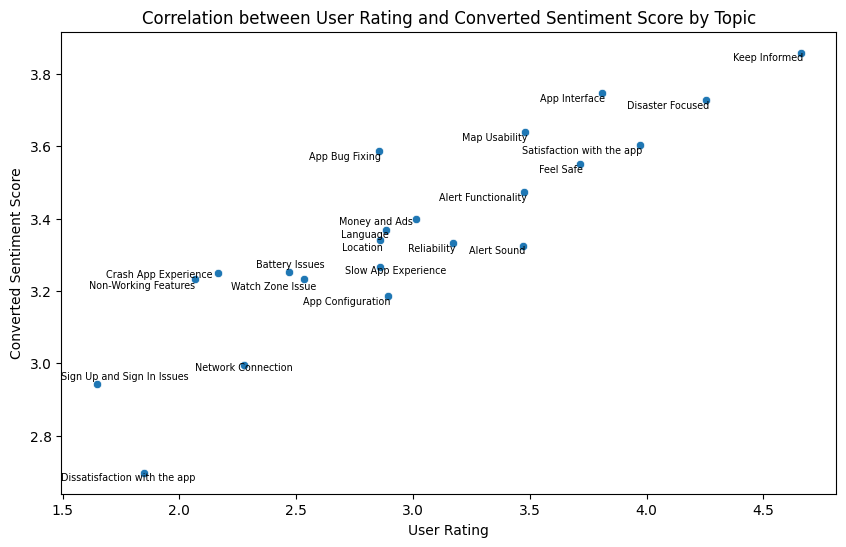

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create scatter plot
plot = sns.scatterplot(data=sentiment_analysis_df, x='score', y='converted_sentiment_score')

# Initialize an empty list to store text objects
texts = []

# Add texts to the plot without drawing arrows, using 'topic' as the label
for i in range(sentiment_analysis_df.shape[0]):
    texts.append(plot.text(sentiment_analysis_df.score[i]+0.01, sentiment_analysis_df.converted_sentiment_score[i],
                           sentiment_analysis_df.topic[i], horizontalalignment='left', size='x-small', color='black', weight='normal'))

# Use adjust_text to prevent overlap, without arrows
adjust_text(texts, expand_points=(1.2, 1.2))

plt.title('Correlation between User Rating and Converted Sentiment Score by Topic')
plt.xlabel('User Rating')
plt.ylabel('Converted Sentiment Score')

plt.savefig('../output/correlation_plot.png', dpi=300, bbox_inches='tight')

plt.show()


# 7. Statistic Descriptive based on APP

In [29]:
# Group the DataFrame by 'topic' and then calculate the required statistics
grouped_stats = df.groupby('topic').agg(
    Percentage_negative_sentiment_review=('sentiment', lambda x: (x == 'negative').mean() * 100),
    Average_sentiment=('sentiment_score', 'mean'),
    Percentage_negative_rating_score=('score', lambda x: (x < 3).mean() * 100),
    Average_rating_score=('score', 'mean')
).reset_index()

# Sort the DataFrame based on the 'Percentage_negative_sentiment_review' column in descending order
grouped_stats = grouped_stats.sort_values(by='Percentage_negative_sentiment_review', ascending=False)

# Reset index if you need a clean index
grouped_stats = grouped_stats.reset_index(drop=True)

# Now you can print the result or save it to a file
grouped_stats


,topic,Percentage_negative_sentiment_review,Average_sentiment,Percentage_negative_rating_score,Average_rating_score
0,Dissatisfaction with the app,57.549234,-0.151383,77.461707,1.849015
1,Sign Up and Sign In Issues,40.645161,-0.029214,80.645161,1.645161
2,Network Connection,37.857143,-0.002694,62.857143,2.278571
3,Watch Zone Issue,33.093525,0.116447,53.237410,2.532374
4,App Configuration,32.520325,0.092417,42.276423,2.894309
5,Slow App Experience,31.955923,0.132786,44.903581,2.859504
6,Feel Safe,31.775701,0.275227,30.841121,3.714953
7,Alert Sound,30.735931,0.162539,29.004329,3.471861
8,Money and Ads,30.627306,0.199857,45.387454,3.011070
9,Battery Issues,28.676471,0.126674,57.352941,2.470588


In [30]:
grouped_stats.to_clipboard(index=False, header=True)